In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 29s 2us/step


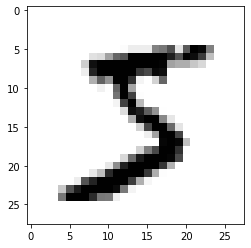

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [12]:
#Even though a binary representation shows the image to be black numbers on white, 
#the actual images in the dataset is white numbers on black
#0 represents black whereas 255 represents white

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Preprocessing the data - Normalization

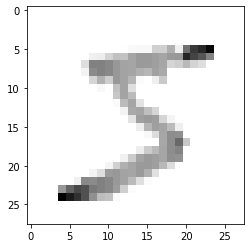

In [13]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [14]:
#After normalization, pixel values range from 0 to 1 instead of 0 to 255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing the image to make it suitable for convolution

In [23]:
IMG_SIZE = 28
x_trainR = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #increasing 1 dimension for kernel/filter
x_testR = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(x_trainR.shape) #Training Samples dimension
print(x_testR.shape) #Testing Samples dimension

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Creating a Deep Neural Network 

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [25]:
model = Sequential()

#### First Convolution Layer

In [26]:
model.add(Conv2D(64, (3,3), input_shape=x_trainR.shape[1:])) #For first convolution layer to mention input layer size
model.add(Activation('relu')) #To make it non-linear, i.e., to drop values <0 and allow those >0
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling single maximum value of 2x2

#### Second Convolution Layer

In [27]:
model.add(Conv2D(64, (3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#### Third Convolution Layer

In [28]:
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

### Fully Connected Layer #1

In [29]:
model.add(Flatten()) #Before using fully connected layer, we need to flatten from 2D to 1D
model.add(Dense(64))
model.add(Activation('relu'))

### Fully Connected Layer #2

In [30]:
model.add(Dense(32))
model.add(Activation('relu'))

### Last Fully Connected Layer
#### Output must be equal to number of classes (10)

In [31]:
model.add(Dense(10))
model.add(Activation('softmax')) #Softmax is used for class probabilities

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.fit(x_trainR, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 29s 21ms/step - loss: 0.3405 - accuracy: 0.8938 - val_loss: 0.1388 - val_accuracy: 0.9585
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.1107 - accuracy: 0.9654 - val_loss: 0.1256 - val_accuracy: 0.9608
Epoch 3/5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0787 - accuracy: 0.9758 - val_loss: 0.0815 - val_accuracy: 0.9733
Epoch 4/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0723 - val_accuracy: 0.9786
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0766 - val_accuracy: 0.9765


## Evaluating model on MNIST test dataset

In [35]:
test_loss, test_acc = model.evaluate(x_testR, y_test)

print("Test loss on 10,000 samples= ", test_loss)
print("Validation accuracy on 10,000 samples= ", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0732 - accuracy: 0.9786
Test loss on 10,000 samples=  0.07321543246507645
Validation accuracy on 10,000 samples=  0.978600025177002


In [38]:
predictions = model.predict([x_testR])
print(np.argmax(predictions[127]))

313/313 [==============================] - 2s 8ms/step
5


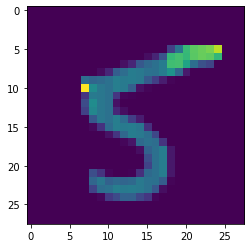

In [39]:
plt.imshow(x_testR[127])

# Using OpenCV to load & classify custom images

In [41]:
import cv2

In [43]:
img = cv2.imread('eight.png')

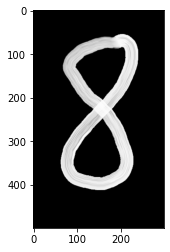

In [44]:
plt.imshow(img)

In [60]:
img.shape

(500, 300, 3)

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [61]:
gray.shape

(500, 300)

In [64]:
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)

In [65]:
resized.shape

(28, 28)

In [66]:
newImg = tf.keras.utils.normalize(resized, axis=1) # 0 to 1

In [67]:
newImg = np.array(newImg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #Kernel operation on convolution layer

In [68]:
newImg.shape

(1, 28, 28, 1)

In [69]:
prediction = model.predict(newImg)

1/1 [==============================] - 0s 25ms/step


In [70]:
print(np.argmax(prediction))

8
